# The Data:

We will be using data from a Kaggle data set:

https://www.kaggle.com/harlfoxem/housesalesprediction

#### Feature Columns
    
* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('kc_house_data.csv')

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
df.isnull().sum()  # i.e no null values

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [8]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# EDA:

<Axes: xlabel='price', ylabel='Count'>

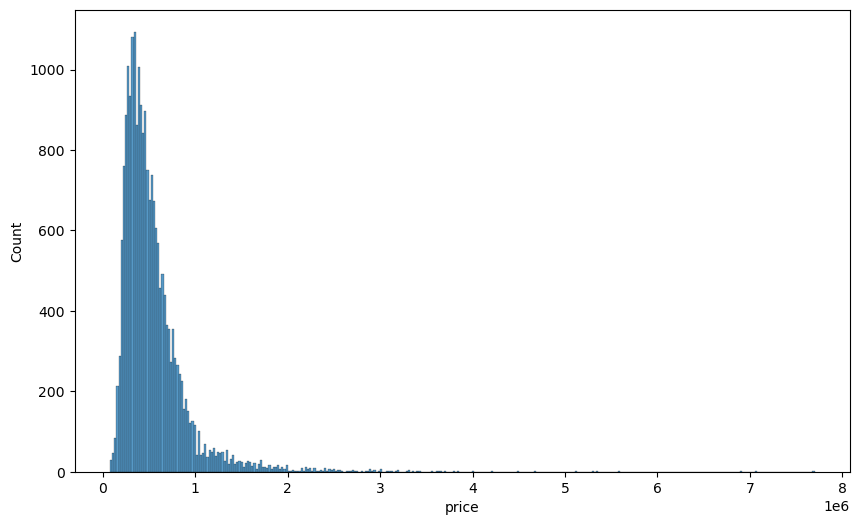

In [13]:
plt.figure(figsize=(10,6))
sns.histplot(df['price'])

le6 =10^6

In [15]:
df['bedrooms'].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  8,  9, 11, 10, 33], dtype=int64)

<Axes: xlabel='bedrooms', ylabel='count'>

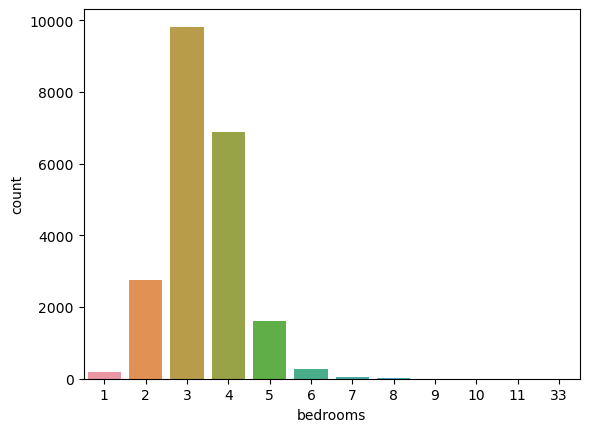

In [18]:
sns.countplot(df, x='bedrooms')    # sns.countplot(df['bedrooms']) gives wrong plot

# Finding correlation b/w the features:

In [20]:
df.corr(numeric_only=True)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.002727,0.011536,-0.023803,0.008188,-0.010799,-0.005193,0.021617,-0.016925,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.266398,0.397370,0.036056,0.667951,0.605368,0.323799,0.053953,0.126424,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.006834,0.080008,0.026496,0.356563,0.479386,0.302808,0.155670,0.018389,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063744,0.188386,-0.126479,0.665838,0.686668,0.283440,0.507173,0.050544,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.103854,0.284709,-0.059445,0.762779,0.876448,0.435130,0.318152,0.055308,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021632,0.074900,-0.008830,0.114731,0.184139,0.015418,0.052946,0.007686,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.023755,0.028814,-0.264075,0.458794,0.523989,-0.245715,0.489193,0.006427,-0.059541,0.049239,0.125943,0.280102,-0.010722
waterfront,-0.002727,0.266398,-0.006834,0.063744,0.103854,0.021632,0.023755,1.000000,0.401971,0.016611,0.082888,0.072109,0.080559,-0.026153,0.092873,0.030272,-0.014306,-0.041904,0.086507,0.030781
view,0.011536,0.397370,0.080008,0.188386,0.284709,0.074900,0.028814,0.401971,1.000000,0.045999,0.251728,0.167609,0.277078,-0.053636,0.103951,0.084622,0.005871,-0.078107,0.280681,0.072904
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016611,0.045999,1.000000,-0.146896,-0.158904,0.173849,-0.361592,-0.060788,0.002888,-0.015102,-0.105877,-0.093072,-0.003126


In [27]:
df.corr(numeric_only=True)['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
view             0.397370
sqft_basement    0.323799
bedrooms         0.308787
lat              0.306692
waterfront       0.266398
floors           0.256804
yr_renovated     0.126424
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
condition        0.036056
long             0.022036
id              -0.016772
zipcode         -0.053402
Name: price, dtype: float64

### i.e sqft_living has a high correlation with price

<Axes: xlabel='price', ylabel='sqft_living'>

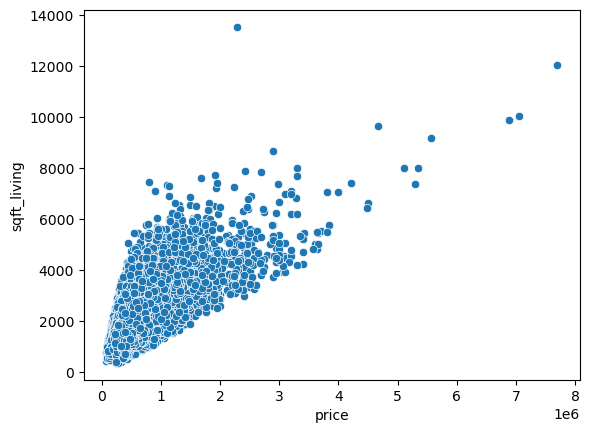

In [28]:
sns.scatterplot(df, x='price', y='sqft_living')

<Axes: xlabel='price', ylabel='grade'>

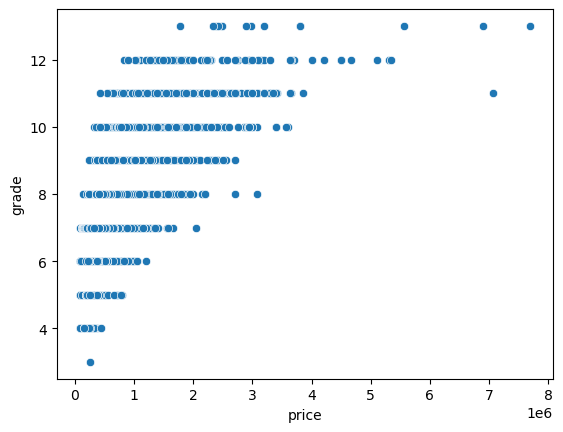

In [30]:
sns.scatterplot(df, x='price', y='grade')

In [31]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

<Axes: xlabel='price', ylabel='long'>

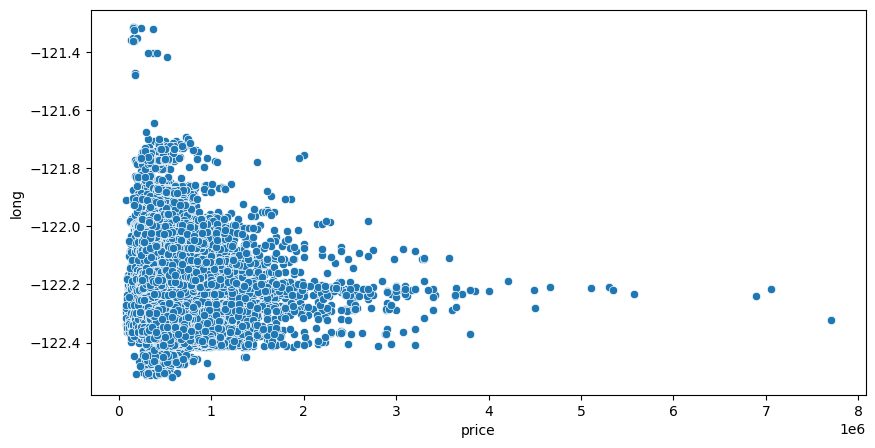

In [35]:
plt.figure(figsize=(10,5))
sns.scatterplot(df, x='price', y='long')

<Axes: xlabel='price', ylabel='lat'>

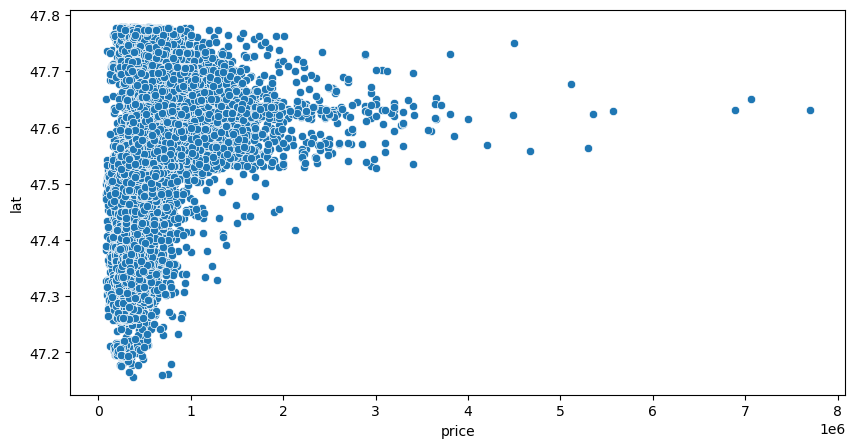

In [36]:
plt.figure(figsize=(10,5))
sns.scatterplot(df, x='price', y='lat')

### i.e at a particulat latitude and longitude the price of the houses increases

## Plotting the price of houses wrt their latitude and longitude:

<Axes: xlabel='long', ylabel='lat'>

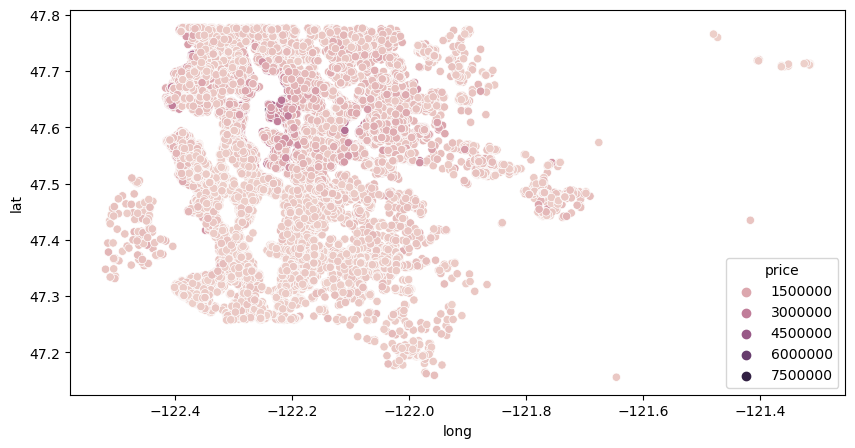

In [38]:
plt.figure(figsize=(10,5))
sns.scatterplot(df, x='long', y='lat', hue='price')

### which is similar to the map of King County(KC)/ Seattle

# Dropping expensive outlying houses:

In [41]:
df.sort_values('price', ascending=False).head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [43]:
len(df)*0.01   # 1% of the houses

215.97

In [44]:
non_top_1_perc = df.sort_values('price', ascending=False)[216:]

<Axes: xlabel='long', ylabel='lat'>

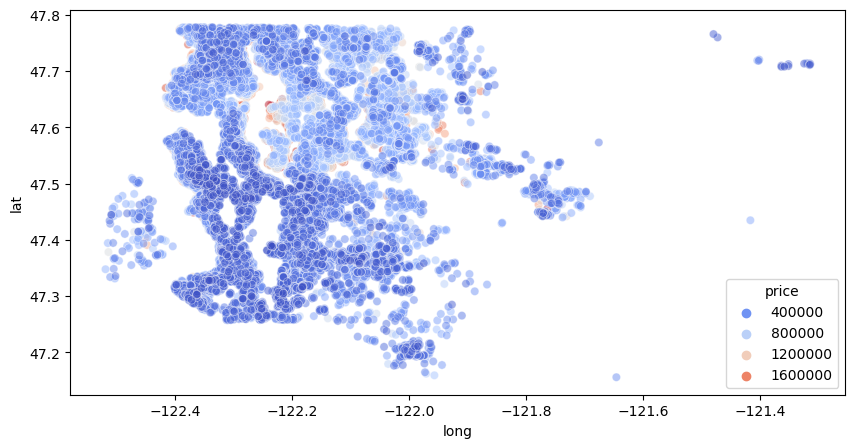

In [51]:
plt.figure(figsize=(10,5))
sns.scatterplot(non_top_1_perc, x='long', y='lat', hue='price', palette='coolwarm', alpha=0.5)

### which gives us a better plot and shows us that houses near a waterfront have a higher price

<Axes: xlabel='waterfront', ylabel='price'>

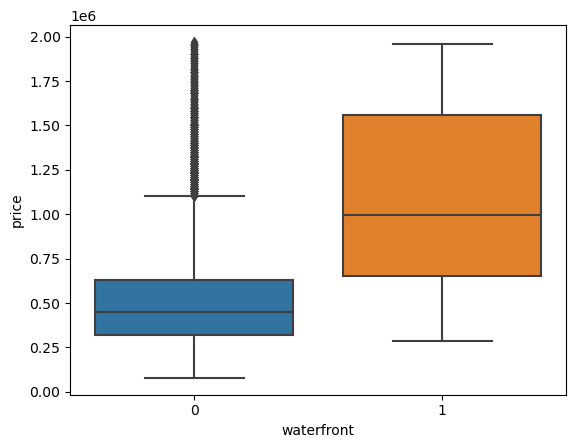

In [52]:
sns.boxplot(non_top_1_perc, x='waterfront', y='price')

# Feature Enginnering:

In [53]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [54]:
df = df.drop('id', axis=1)

In [55]:
df['date'] = pd.to_datetime(df['date'])

In [57]:
df['year'] = df['date'].apply(lambda date: date.year)
df['month'] = df['date'].apply(lambda date: date.month)

In [58]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


<Axes: xlabel='month', ylabel='price'>

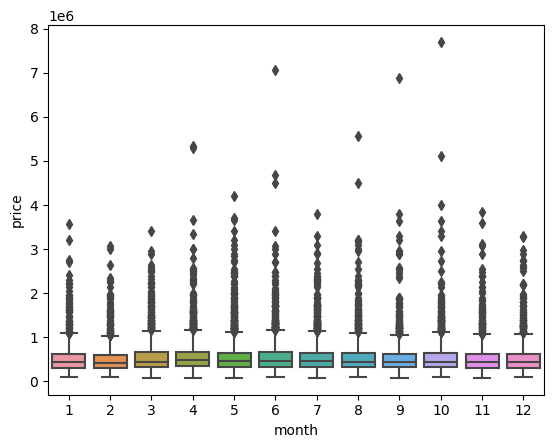

In [60]:
sns.boxplot(df, x='month', y='price')

In [63]:
df.groupby('month').mean(numeric_only=True)['price']

month
1     525963.251534
2     508520.051323
3     544057.683200
4     562215.615074
5     550849.746893
6     557534.318182
7     544892.161013
8     536655.212481
9     529723.517787
10    539439.447228
11    522359.903478
12    524799.902041
Name: price, dtype: float64

<Axes: xlabel='month'>

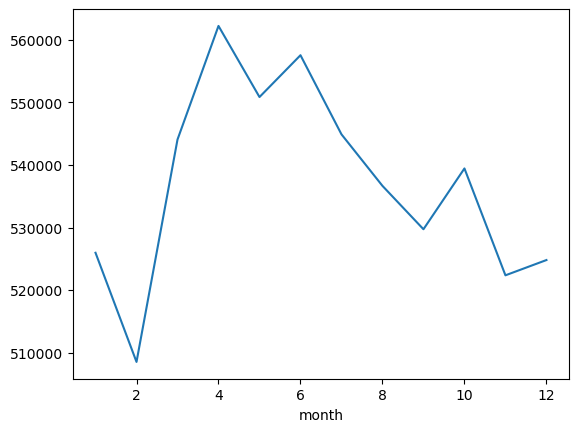

In [67]:
df.groupby('month').mean(numeric_only=True)['price'].plot()

### i.e not that difference in price wrt month

<Axes: xlabel='year'>

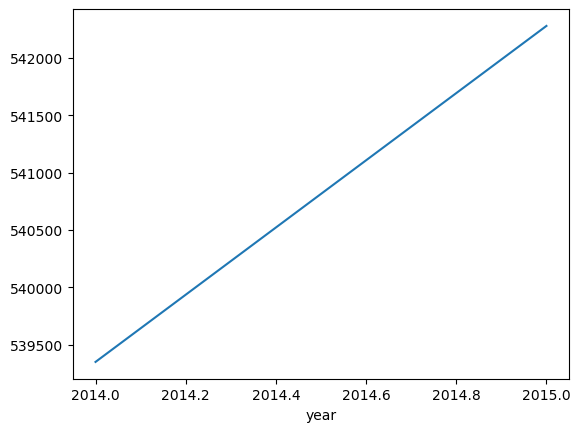

In [65]:
df.groupby('year').mean(numeric_only=True)['price'].plot()

this shows that price is increasing linearly wrt years

In [68]:
df = df.drop('date', axis=1)

In [69]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


In [71]:
# df['zipcode'].value_counts()

In [72]:
df = df.drop('zipcode', axis=1)

In [73]:
df['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

### this column will be useful as the houses that are renovated will mostly have a higher price than the non-renovated ones.

# Seperating Data:

In [74]:
X = df.drop('price', axis=1).values     # .values -> to convert into numpy array
y = df['price'].values

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Scaling:

In [77]:
from sklearn.preprocessing import MinMaxScaler

In [78]:
scaler = MinMaxScaler()

In [79]:
X_train = scaler.fit_transform(X_train)

In [80]:
X_test = scaler.transform(X_test)     # .transform -> as we don't want data leakage

# Model:

In [82]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [83]:
X_train.shape

(15117, 19)

In [85]:
model = Sequential()

model.add(Dense(19, activation='relu'))   # input layer

model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))   # hidden layers
model.add(Dense(19, activation='relu'))

model.add(Dense(1))     # output layer

model.compile(optimizer='adam', loss='mse')

# Training the model:

In [86]:
model.fit(x=X_train, y=y_train,
          validation_data=(X_test, y_test),
         batch_size=128, epochs=400)

Epoch 1/400
119/119 [==============================] - 1s 3ms/step - loss: 430226014208.0000 - val_loss: 418835726336.0000
Epoch 2/400
119/119 [==============================] - 0s 2ms/step - loss: 428274712576.0000 - val_loss: 412230090752.0000
Epoch 3/400
119/119 [==============================] - 0s 2ms/step - loss: 402840911872.0000 - val_loss: 355294806016.0000
Epoch 4/400
119/119 [==============================] - 0s 2ms/step - loss: 290687614976.0000 - val_loss: 191507693568.0000
Epoch 5/400
119/119 [==============================] - 0s 2ms/step - loss: 135238811648.0000 - val_loss: 96814972928.0000
Epoch 6/400
119/119 [==============================] - 0s 2ms/step - loss: 97758937088.0000 - val_loss: 93381992448.0000
Epoch 7/400
119/119 [==============================] - 0s 2ms/step - loss: 95522578432.0000 - val_loss: 91694383104.0000
Epoch 8/400
119/119 [==============================] - 0s 2ms/step - loss: 93655007232.0000 - val_loss: 89835749376.0000
Epoch 9/400
119/119 [==

Epoch 135/400
119/119 [==============================] - 0s 2ms/step - loss: 32469544960.0000 - val_loss: 30816110592.0000
Epoch 136/400
119/119 [==============================] - 0s 2ms/step - loss: 32458672128.0000 - val_loss: 30788659200.0000
Epoch 137/400
119/119 [==============================] - 0s 2ms/step - loss: 32385673216.0000 - val_loss: 30845825024.0000
Epoch 138/400
119/119 [==============================] - 0s 2ms/step - loss: 32416747520.0000 - val_loss: 30799183872.0000
Epoch 139/400
119/119 [==============================] - 0s 2ms/step - loss: 32347461632.0000 - val_loss: 30718986240.0000
Epoch 140/400
119/119 [==============================] - 0s 2ms/step - loss: 32349405184.0000 - val_loss: 30669942784.0000
Epoch 141/400
119/119 [==============================] - 0s 2ms/step - loss: 32319268864.0000 - val_loss: 30644039680.0000
Epoch 142/400
119/119 [==============================] - 0s 2ms/step - loss: 32295098368.0000 - val_loss: 30631323648.0000
Epoch 143/400
11

119/119 [==============================] - 0s 2ms/step - loss: 30332112896.0000 - val_loss: 28278814720.0000
Epoch 268/400
119/119 [==============================] - 0s 2ms/step - loss: 30312050688.0000 - val_loss: 28235202560.0000
Epoch 269/400
119/119 [==============================] - 0s 2ms/step - loss: 30308866048.0000 - val_loss: 28356462592.0000
Epoch 270/400
119/119 [==============================] - 0s 2ms/step - loss: 30269657088.0000 - val_loss: 28260302848.0000
Epoch 271/400
119/119 [==============================] - 0s 2ms/step - loss: 30270007296.0000 - val_loss: 28240975872.0000
Epoch 272/400
119/119 [==============================] - 0s 2ms/step - loss: 30239555584.0000 - val_loss: 28285941760.0000
Epoch 273/400
119/119 [==============================] - 0s 2ms/step - loss: 30408531968.0000 - val_loss: 28189782016.0000
Epoch 274/400
119/119 [==============================] - 0s 2ms/step - loss: 30285357056.0000 - val_loss: 28163899392.0000
Epoch 275/400
119/119 [=======

119/119 [==============================] - 0s 2ms/step - loss: 28578785280.0000 - val_loss: 26129778688.0000
Epoch 400/400
119/119 [==============================] - 0s 2ms/step - loss: 28532146176.0000 - val_loss: 26176335872.0000


# Model Evaluation:

In [90]:
losses = pd.DataFrame(model.history.history)
losses                                       # loss -> loss on training data, val_loss-> loss on validation data

,loss,val_loss
0,4.302260e+11,4.188357e+11
1,4.282747e+11,4.122301e+11
2,4.028409e+11,3.552948e+11
3,2.906876e+11,1.915077e+11
4,1.352388e+11,9.681497e+10
...,...,...
395,2.859127e+10,2.619486e+10
396,2.856846e+10,2.616263e+10
397,2.853888e+10,2.622299e+10
398,2.857879e+10,2.612978e+10


<Axes: >

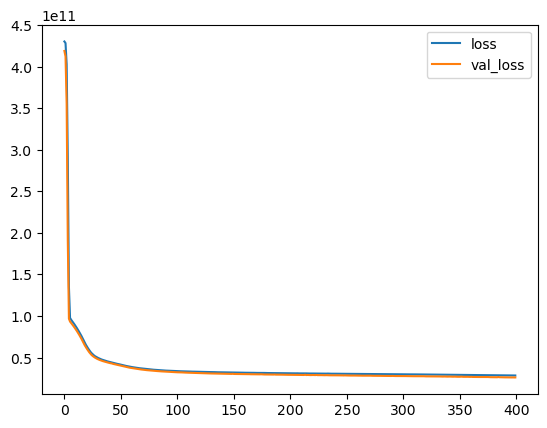

In [91]:
losses.plot()

if valication loss > loss => overfitting <br>
In this case, the val_loss < loss that means we can continue training if we want to

In [93]:
predictions = model.predict(X_test)

203/203 [==============================] - 1s 2ms/step


In [92]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

In [96]:
mean_squared_error(y_test, predictions)    # is way large cause it is the "squared" error

26176333133.61104

In [99]:
mean_squared_error(y_test, predictions)**0.5      # Root MSE

161791.01685078512

In [97]:
mean_absolute_error(y_test, predictions)

100857.70309485919

In [101]:
df['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [103]:
5.402966e+05    # mean price of a house

540296.6

In [104]:
100857.7   # mean error

100857.7

### i.e we are off by 20% => we are not doing that good or that bad

In [105]:
explained_variance_score(y_test, predictions)      # which shows us that we have 80% accuracy

0.8030405561890942

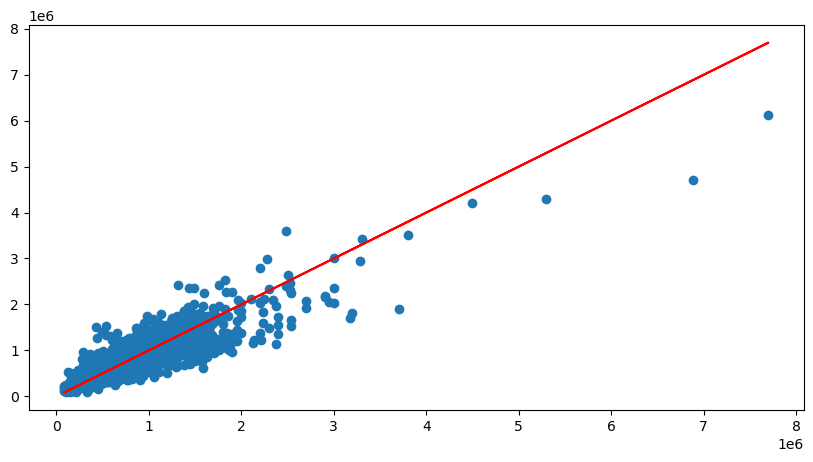

In [109]:
plt.figure(figsize=(10,5))
plt.scatter(y_test, predictions)
plt.plot(y_test, y_test, 'r')

### The plot shows us that we are being punished for the outlying points

## Predicting the price of a particular house:

In [139]:
single_house = df.drop('price', axis=1).loc[0]       # use loc instead of iloc
single_house

bedrooms            3.0000
bathrooms           1.0000
sqft_living      1180.0000
sqft_lot         5650.0000
floors              1.0000
waterfront          0.0000
view                0.0000
condition           3.0000
grade               7.0000
sqft_above       1180.0000
sqft_basement       0.0000
yr_built         1955.0000
yr_renovated        0.0000
lat                47.5112
long             -122.2570
sqft_living15    1340.0000
sqft_lot15       5650.0000
year             2014.0000
month              10.0000
Name: 0, dtype: float64

In [134]:
single_house = scaler.transform(single_house.values.reshape(-1,19))

In [135]:
model.predict(single_house)

1/1 [==============================] - 0s 33ms/step


array([[284199.78]], dtype=float32)

In [138]:
df.loc[0]['price']

221900.0